In [25]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [3]:
boston = datasets.load_boston()

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
boston.data[0:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [6]:
boston.target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston_data = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
X = boston.data
y = boston.target

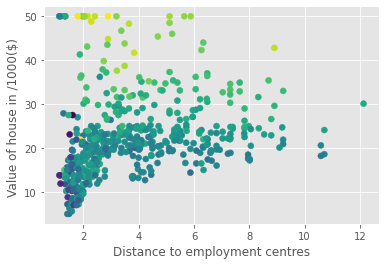

In [23]:
plt.scatter(boston_data.DIS,y,c=boston_data.RM)
plt.ylabel('Value of house in /1000($) ')
plt.xlabel('Distance to employment centres')
plt.show()

In [26]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
reg.score(X_test,Y_test)

0.6844267283527105

In [29]:
reg.score(X_train,Y_train)

0.748087259862344

# Cross validation or Regression problems

In [30]:
from sklearn.model_selection import cross_val_score

In [35]:
reg = LinearRegression()

cvfit = cross_val_score(reg,X,y,cv=5)

print(cvfit , np.mean(cvfit))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154] 0.35327592439588124


# Regularization in regression

- Large coefficient can lead to overfitting. Penalizing large coefficient is called as regularization

In [38]:
## L1 regularization
from sklearn.linear_model import Ridge

In [49]:
rreg = Ridge(alpha = 0.0025 , normalize = True)

In [50]:
rreg.fit(X_train,Y_train)

rreg.score(X_test,Y_test)

0.6841806926773043

In [51]:
rreg.coef_

array([-1.27028272e-01,  2.88450187e-02,  4.52493326e-02,  2.78750442e+00,
       -1.59756732e+01,  4.37581038e+00, -9.27554211e-03, -1.38419563e+00,
        2.49084401e-01, -9.56044558e-03, -9.18267469e-01,  1.31521550e-02,
       -5.16040561e-01])

In [52]:
## L2 regularization
from sklearn.linear_model import Lasso

In [55]:
lreg = Lasso(alpha = 0.01 , normalize = True)

In [56]:
lreg.fit(X_train,Y_train)
lreg.score(X_test,Y_test)

0.6528653353152862

In [57]:
lreg.coef_

array([-6.08177830e-02,  1.52886678e-04, -0.00000000e+00,  2.50176850e+00,
       -7.86432647e+00,  4.60301624e+00, -0.00000000e+00, -7.07019661e-01,
        0.00000000e+00, -0.00000000e+00, -7.76669497e-01,  1.07598697e-02,
       -5.22724444e-01])